In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn= engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
inspector = inspect(engine)
m_columns= inspector.get_columns('measurement')
for rows in m_columns:
    print(rows)
    
#s_columns= inspector.get_columns('station')
#for rows in s_columns:
#    print(rows)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

date = session.query(measurement.date).order_by(measurement.date.desc()).first()
for d in date:
    print(d)

2017-08-23


Text(0.5, 0, 'Date')

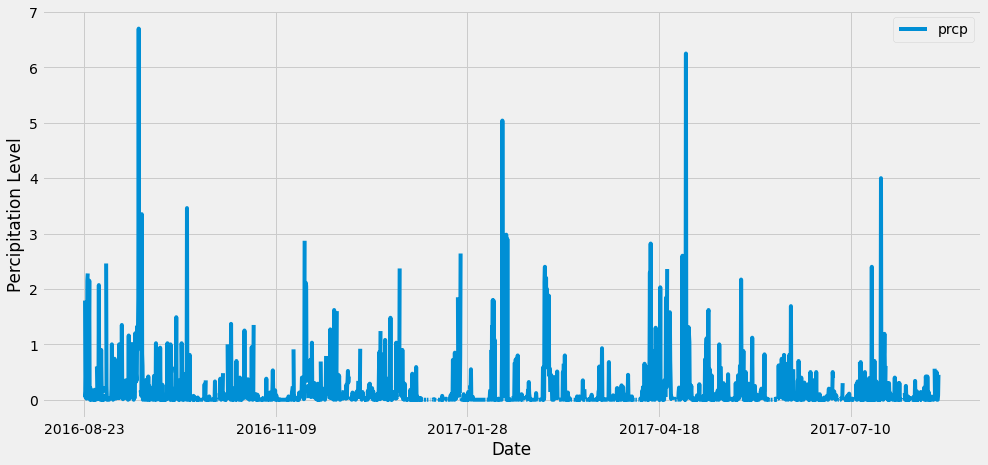

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
df= pd.read_sql("select date,prcp from measurement", conn)
df
# Calculate the date one year from the last date in data set.
df=df.loc[df['date']>"2016-08-22"].sort_values('date')
df

# Use Pandas Plotting with Matplotlib to plot the data

ax = df.plot(x='date', y="prcp",figsize=(15,7))
ax.set_ylabel('Percipitation Level')
ax.set_xlabel('Date')



In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [26]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
all_stations= session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
for s in all_stations:
    print(s)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active= session.query(func.min(measurement.tobs), func.avg(measurement.tobs),func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

for t in most_active:
    print(t)

(54.0, 71.66378066378067, 85.0)


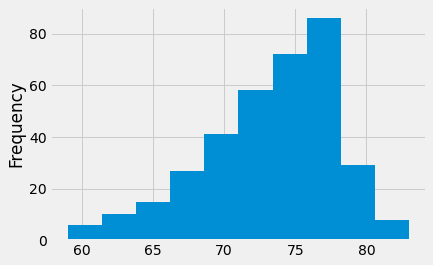

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obs_data= session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date > "2016-08-22").all()

temps = []
for d in obs_data:
    temps.append(d[0])
temps

plt.hist(temps)
plt.ylabel('Frequency')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()